**2. Build a Logistic Regression Learning model based on the pseu-docode described in the ‘Introduction to Machine Learning- EthenAlpaydin’, given as follows.
Consider  a  2-class  dataset  and  train  the  model  (developed  by you) with the dataset chosen by you. Train the Sklearn logisticregression  model  with  the  same  dataset.  Compare  the  perfro-mance of your model and the sklearn model and conclude whichlearns better for the dataset chosen by you.**

In [320]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))

### Gradient ascent model from scratch

In [321]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with log likelihood gradient
        output_error_signal = target - predictions
        
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient

        # Print log-likelihood every so often
        if step % 10000 == 0:
            print(log_likelihood(features, target, weights))
        
    return weights

In [322]:
weights = logistic_regression(simulated_separableish_features, simulated_labels,
                     num_steps = 50000, learning_rate = 5e-5, add_intercept=True)

-4346.264779152365
-148.70672276805357
-142.96493623107847
-141.54530307157367
-141.060319659308


### Using Sklearn's logistic regression

In [323]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, C = 1e15)
clf.fit(simulated_separableish_features, simulated_labels)

LogisticRegression(C=1000000000000000.0)

In [324]:
print(clf.intercept_, clf.coef_)


[-14.09231079] [[-5.05902155  8.28959202]]


In [325]:
print(weights)

[-13.58690551  -4.8809644    7.99812915]


### Performance of the two models 

In [326]:
final_scores = np.dot(np.hstack((np.ones((simulated_separableish_features.shape[0], 1)),
                                 simulated_separableish_features)), weights)
preds = np.round(sigmoid(final_scores))


In [327]:
print('Accuracy of the gradient ascent model is : {0}'.format((preds == simulated_labels).sum().astype(float) / len(preds)))


Accuracy of the gradient ascent model is : 0.9948


In [328]:
print('Accuracy of sk-learn: {0}'.format(clf.score(simulated_separableish_features, simulated_labels)))


Accuracy of sk-learn: 0.9948


### The performance of gradient ascent model and sk-learn is almost same


**4.For a multivariate 2-class data set where all the input attributes are not numerical, implement the logistic regression model for learning the class of the input. Without using any library function, compute the performance measure of the learning model**

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [330]:
churn_df = pd.read_csv("Churn.csv")
churn_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [331]:
churn_df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [332]:
# Label Encoder is used for mapping categorical data into 1, 2, 3, 4, 5, 6..
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()

In [333]:
le_encoder.fit(churn_df['International plan'].drop_duplicates())

LabelEncoder()

In [334]:
churn_df['International plan'] = le_encoder.transform(churn_df['International plan'])
churn_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,0,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,0,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,0,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,0,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,0,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,0,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,0,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,0,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [335]:
le_encoder.fit(churn_df['Voice mail plan'].drop_duplicates())

LabelEncoder()

In [336]:
churn_df['Voice mail plan'] = le_encoder.transform(churn_df['Voice mail plan'])
churn_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,0,1,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,0,1,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,0,0,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,0,0,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


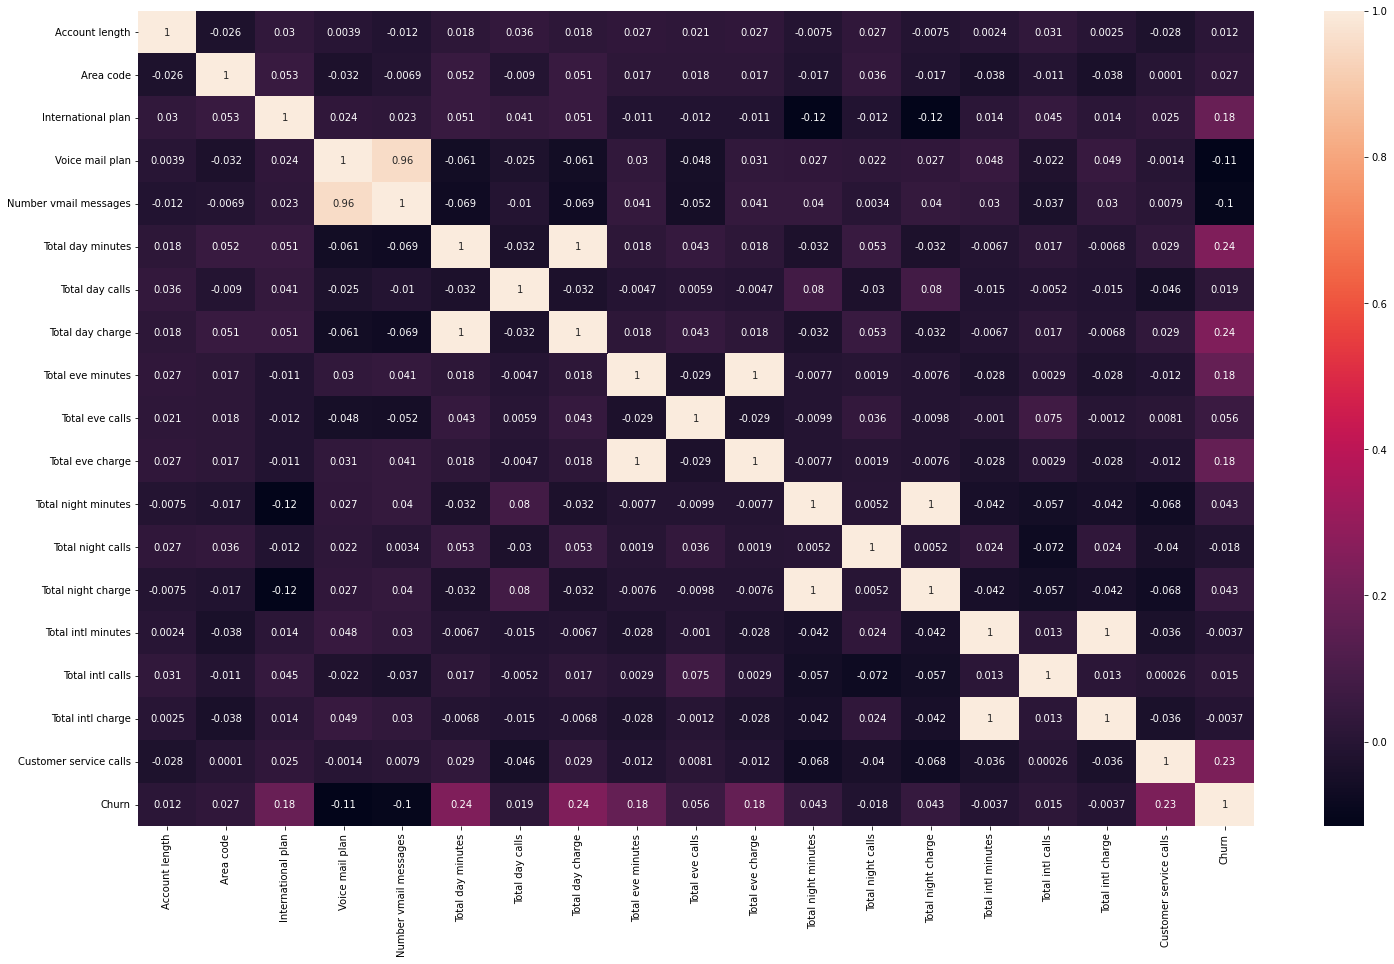

In [337]:
plt.figure(figsize=(25,15))
sns.heatmap(churn_df.corr('pearson'), annot = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


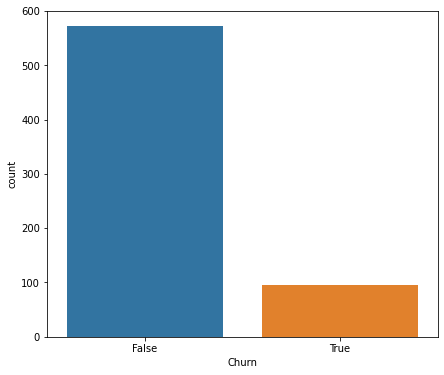

In [338]:
plt.figure(figsize=(7,6))
sns.countplot('Churn', data = churn_df)

In [339]:
churn_df['Churn'].value_counts()

False    572
True      95
Name: Churn, dtype: int64

In [340]:
from sklearn.utils import resample
df_0 = churn_df[churn_df['Churn'] == False]
df_1 = churn_df[churn_df['Churn'] == True]

In [341]:
df_1.shape

(95, 20)

In [342]:
df_1_upsample = resample(df_1, n_samples = 288, replace = True, random_state =123)

In [343]:
df_1_upsample.shape

(288, 20)

In [344]:
churn_df1 = pd.concat([df_0, df_1_upsample])

In [345]:
churn_df1.shape

(860, 20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


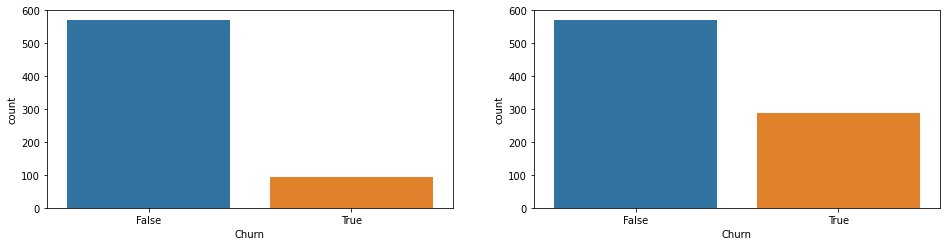

In [346]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.countplot('Churn', data = churn_df)
plt.subplot(2,2,2)
sns.countplot('Churn', data = churn_df1)
plt.show()

In [347]:
X = churn_df1.drop(['State', 'Number vmail messages', 'Total day charge','Total eve charge', 'Total night charge', 'Total intl charge', 'Churn'],axis = 1)
Y = churn_df1['Churn']

In [348]:
X

,Account length,Area code,International plan,Voice mail plan,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls
0,117,408,0,0,184.5,97,351.6,80,215.8,90,8.7,4,1
3,111,415,0,0,110.4,103,137.3,102,189.6,105,7.7,6,2
4,49,510,0,0,119.3,117,215.1,109,178.7,90,11.1,1,1
5,36,408,0,1,146.3,128,162.5,80,129.3,109,14.5,6,0
6,65,415,0,0,211.3,120,162.6,122,134.7,118,13.2,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,128,408,0,0,227.9,130,302.6,71,191.5,82,5.5,7,1
500,58,415,0,0,247.2,116,303.7,103,105.4,94,9.3,2,2
1,65,415,0,0,129.1,137,228.5,83,208.8,111,12.7,6,4
226,80,408,0,0,322.3,113,222.0,95,162.8,123,6.7,8,0


In [349]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0 )

In [350]:
class MyLogitRegression() :
    learning_rate = 0.01
    iterations = 1000
    # Function for model training    
    def fit( self, X, Y ) :        
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape        
        # weight initialization        
        self.W = np.zeros( self.n )        
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
          
        # calculate gradients        
        tmp = ( A - self.Y.T )        
        tmp = np.reshape( tmp, self.m )        
        dW = np.dot( self.X.T, tmp ) / self.m         
        db = np.sum( tmp ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db
          
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X ) :    
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )        
        Y = np.where( Z > 0.5, 1, 0 )        
        return Y

In [351]:
 mymodel = MyLogitRegression()
 mymodel.fit( X_train, Y_train ) 

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [352]:
Y_pred = mymodel.predict( X_test )    

In [353]:
# measure performance    
correctly_classified = 0    
# counter    
count = 0 

In [354]:
Y_test=np.asarray(Y_test)

In [355]:
for count in range( np.size( Y_pred ) ) :
  if Y_test[count] == Y_pred[count] :
    correctly_classified = correctly_classified + 1
  count = count + 1
print( "Accuracy on test set by our model       :  ", (correctly_classified / count ) * 100 )

Accuracy on test set by our model       :   55.749128919860624


**Consider a data set with a minimum of four classes. Use sklearn
logistic regression classier with `One Vs One' strategy and con-
duct the experiment E1. Train the sklearn classier with `one
vs rest' strategy and conduct the experiment E2. Generate the
classcation report for each of the experiment E1 and E2 and
conclude which strategy works better for the dataset chosen by
you.**

In [356]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [357]:
data = pd.read_csv("Iris.csv")

In [358]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [359]:
data.drop('Id',axis=1,inplace=True)

In [360]:
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [361]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [362]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [363]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [364]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [365]:
#Feature & Target Selection
features = data.select_dtypes('float').columns
target = ['Species']
# Feature& Target Dataset
X = data[features]
y = data[target]

In [366]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [367]:
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [368]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0, shuffle=True)

In [369]:
model = LogisticRegression()
ovo = OneVsOneClassifier(model)
#fit model to training data
ovo.fit(X_train, y_train.values.ravel())
#Predications
ovo_pred = ovo.predict(X_test)
print(metrics.classification_report(ovo_pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



One vs Rest
Also known as one-vs-all, this strategy consists of fitting one classifier per class.
Some Explanation: Under this method/strategy a multi-class classification dataset is split into
multiple binary classification chunks/datasets. * Binary Classification Dataset#1: Iris-setosa v/s

In [370]:
ovr = OneVsRestClassifier(model)
ovr.fit(X_train, y_train.values.ravel())
ovr_pred = ovr.predict(X_test)

In [371]:
print(metrics.classification_report(ovr_pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.86      0.92         7

       accuracy                           0.97        30
      macro avg       0.97      0.95      0.96        30
   weighted avg       0.97      0.97      0.97        30



From the above results we can conclude that one vs rest produce better result for this dataset.

*** 9. Consider the 2-class dataset with multiple variables. Train a decision tree classifier and a logistic tree classifier, with the dataset chosen by you. Compute the performance measure of both the models and conclude which models learns better with the dataset chosen by you. ***

In [372]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [373]:
churn_df = pd.read_csv("Churn.csv")
churn_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [374]:
churn_df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

***Data Pre-Processing***

In [375]:
# Label Encoder is used for mapping categorical data into 1, 2, 3, 4, 5, 6..
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()

In [376]:
le_encoder.fit(churn_df['International plan'].drop_duplicates())

LabelEncoder()

In [377]:
churn_df['International plan'] = le_encoder.transform(churn_df['International plan'])
churn_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,0,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,0,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,0,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,0,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,0,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,0,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,0,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,0,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [378]:
le_encoder.fit(churn_df['Voice mail plan'].drop_duplicates())

LabelEncoder()

In [379]:
churn_df['Voice mail plan'] = le_encoder.transform(churn_df['Voice mail plan'])
churn_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,0,1,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,0,1,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,0,0,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,0,0,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


***Correlation***

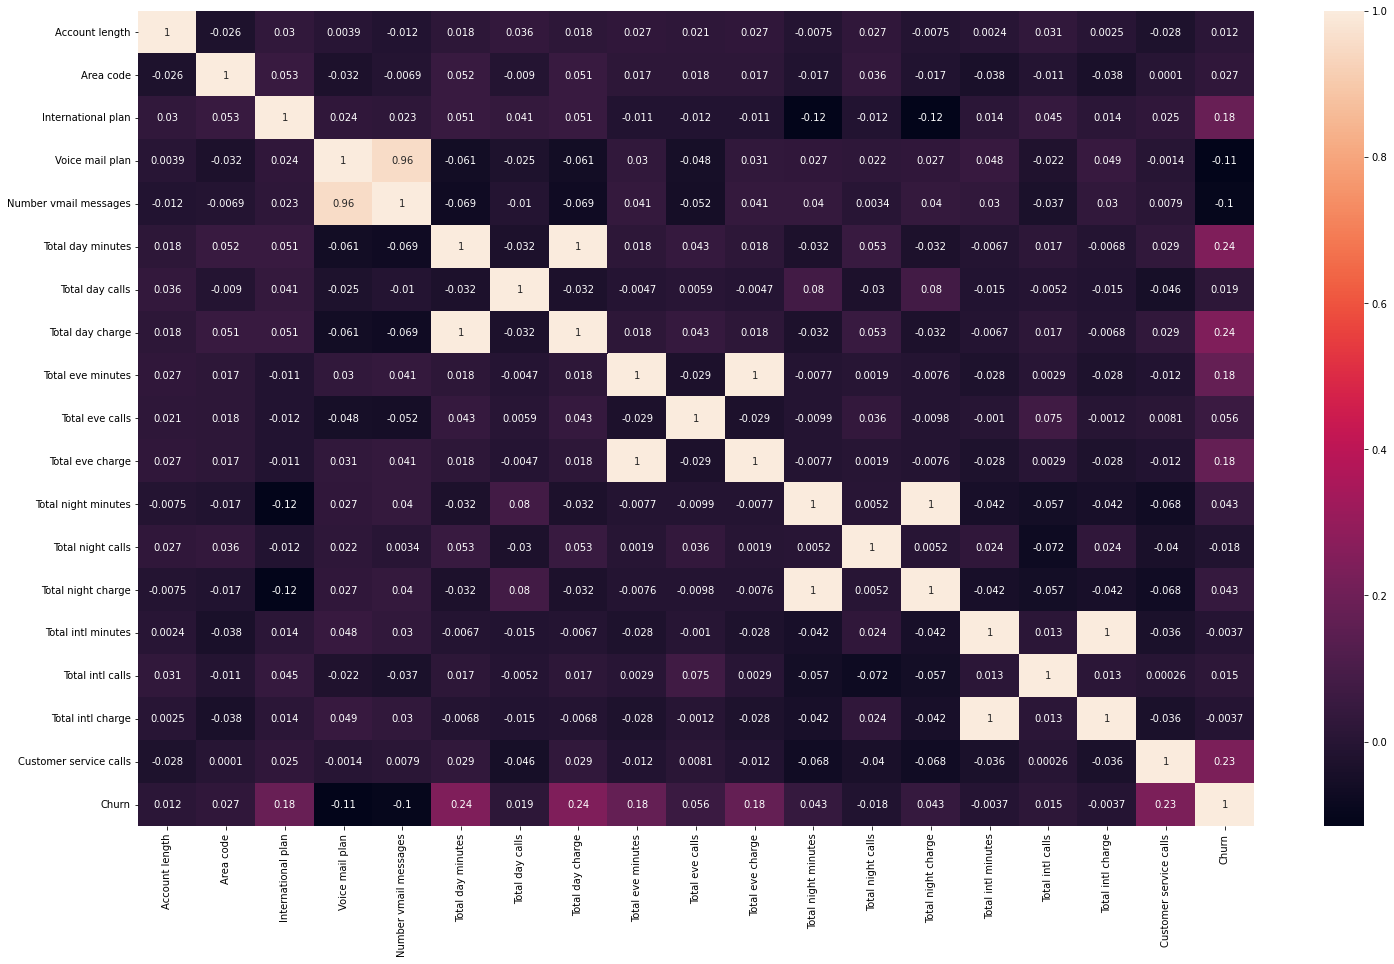

In [380]:
plt.figure(figsize=(25,15))
sns.heatmap(churn_df.corr('pearson'), annot = True)

In [381]:
churn_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


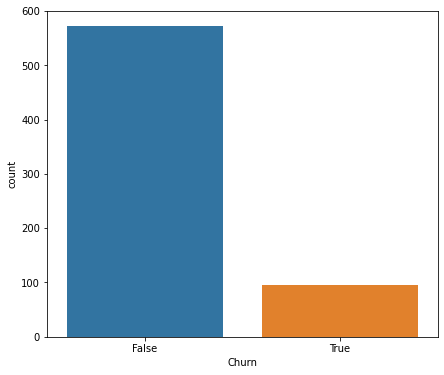

In [382]:
plt.figure(figsize=(7,6))
sns.countplot('Churn', data = churn_df)

In [383]:
churn_df['Churn'].value_counts()

False    572
True      95
Name: Churn, dtype: int64

***Data Augmentation Bootstrap Method***

In [384]:
# resample uses "bootstrapping" method to regenrate samples by randomly selecting data for each class
from sklearn.utils import resample
df_0 = churn_df[churn_df['Churn'] == False]
df_1 = churn_df[churn_df['Churn'] == True]

In [385]:
df_1.shape

(95, 20)

In [386]:
# Apply Resample
df_1_upsample = resample(df_1, n_samples = 288, replace = True, random_state = 123)

In [387]:
d = df_1_upsample.drop_duplicates()
d.shape

(90, 20)

In [388]:
churn_df1 = pd.concat([df_0, df_1_upsample])
churn_df1.shape

(860, 20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


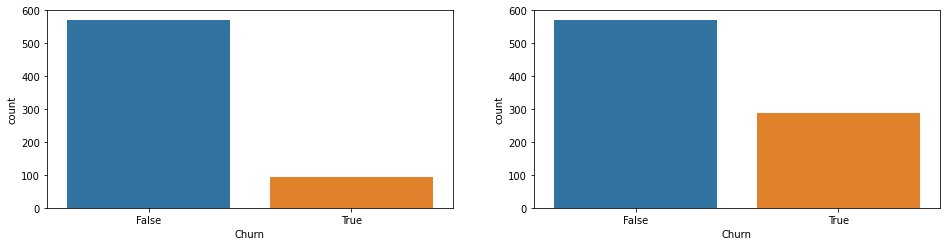

In [389]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.countplot('Churn', data = churn_df)
plt.subplot(2,2,2)
sns.countplot('Churn', data = churn_df1)
plt.show()

In [390]:
X = churn_df1.drop(['State', 'Number vmail messages', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge', 'Churn'], axis = 1)

In [391]:
Y = churn_df1['Churn']

***Train Test Split***

In [392]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size = 0.2, random_state = 3)

In [393]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, Y_train = sm.fit_resample(X_train, Y_train)

In [394]:
X_Full = np.hstack((X_train,Y_train.values.reshape(-1,1)))

In [395]:
S_df = pd.DataFrame(X_Full,columns=[1,2,3,4,5,6,7,8,9,10,11,12,13,'Churn'])
S_df.shape

(894, 14)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


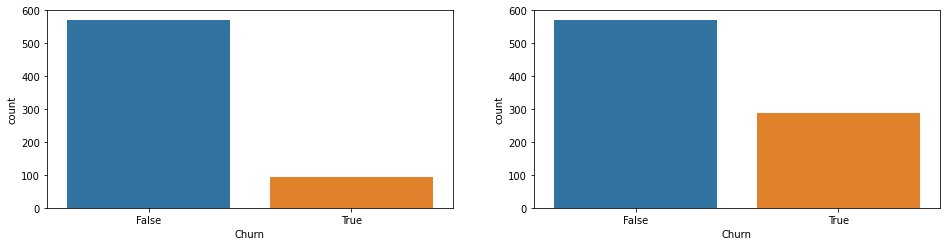

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


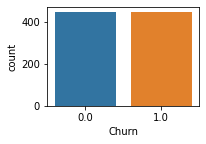

In [396]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.countplot('Churn', data = churn_df)
plt.subplot(2,2,2)
sns.countplot('Churn', data = churn_df1)
plt.show()
plt.subplot(2,2,3)
sns.countplot('Churn', data = S_df)
plt.show()

## **Decision Tree**

In [397]:
from sklearn.tree import DecisionTreeClassifier
# maximum depth of decision trees is 9
clf_tree = DecisionTreeClassifier(criterion = "entropy", random_state = 0, max_depth = 9)

In [398]:
clf_tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=0)

In [399]:
print("Training Accuracy: ",clf_tree.score(X_train, Y_train))

Training Accuracy:  0.9798657718120806


In [400]:
print("Testing Accuracy: ",clf_tree.score(X_test, Y_test))

Testing Accuracy:  0.8895348837209303


***Plotting Decision Tree***

In [401]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [402]:
dot_data = StringIO()
export_graphviz(clf_tree, out_file= dot_data, feature_names=list(X.columns), filled = True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

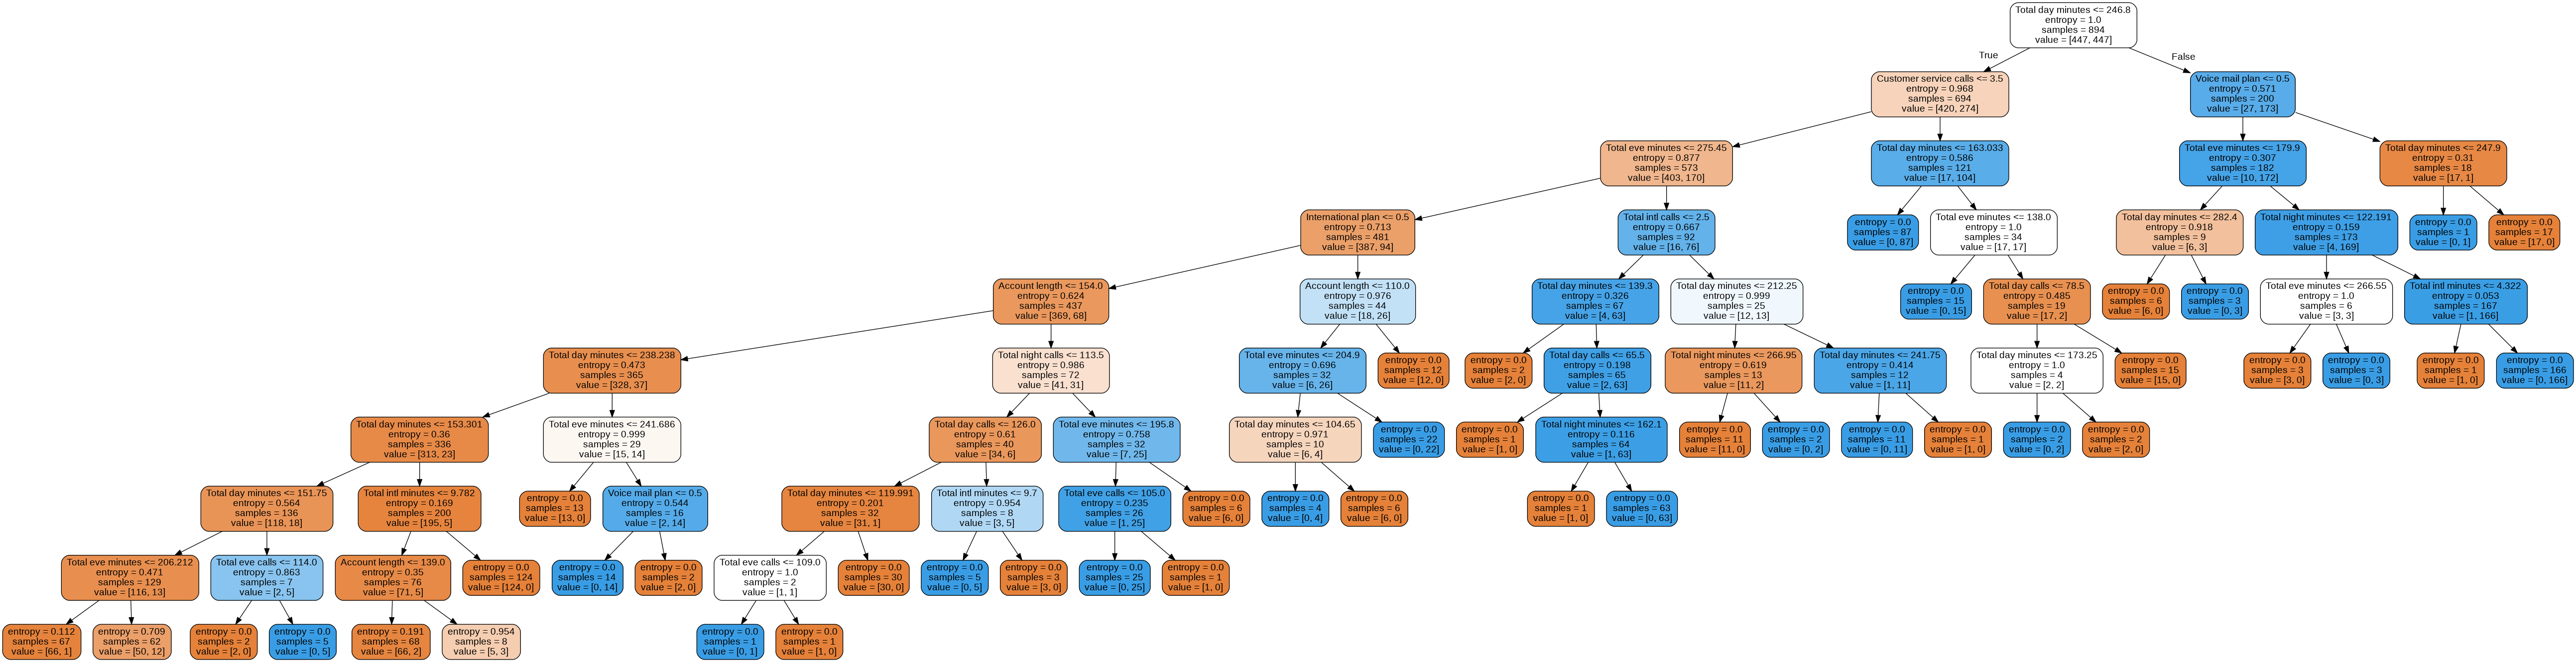

In [403]:
Image(graph.create_png())

In [404]:
Y_Pred = clf_tree.predict(X_test)

In [405]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
report = classification_report(Y_Pred, Y_test)

In [406]:
print(report)

              precision    recall  f1-score   support

       False       0.87      0.97      0.92       112
        True       0.94      0.73      0.82        60

    accuracy                           0.89       172
   macro avg       0.90      0.85      0.87       172
weighted avg       0.89      0.89      0.89       172



## **Logistic Tree**

In [407]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(C = 10, max_iter=100, solver='liblinear', tol=0.001,random_state=0)

In [408]:
 logit_model.fit(X_train, Y_train)

LogisticRegression(C=10, random_state=0, solver='liblinear', tol=0.001)

In [409]:
# Accuracy
print("Training Accuracy: ",logit_model.score(X_train, Y_train))

Training Accuracy:  0.7807606263982103


In [410]:
# Accuracy
print("Testing Accuracy: ",logit_model.score(X_test, Y_test))

Testing Accuracy:  0.7732558139534884


In [411]:
predictions = logit_model.predict(X_test)

In [412]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(Y_test, predictions)

array([[91, 34],
       [ 5, 42]])

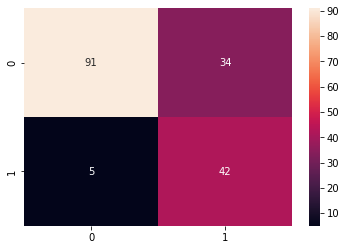

In [413]:
sns.heatmap(confusion_matrix(Y_test, predictions), annot = True, fmt='0.0f')

In [414]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

       False       0.95      0.73      0.82       125
        True       0.55      0.89      0.68        47

    accuracy                           0.77       172
   macro avg       0.75      0.81      0.75       172
weighted avg       0.84      0.77      0.79       172



From the above result we can conclude that model trained using Decision tree learns better than model trained using Logistic Tree Classifier